In [1]:
#loading basic dependencies
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data
data = pd.read_csv('Customers_in_a_Shop.csv',header=None)
data.columns = ['Date','Customers']
data['Date'] = pd.to_datetime(data['Date'],format="%Y-%m")
data = data.set_index('Date')

#shape of the data
data.shape,data


((144, 1),
             Customers
 Date                 
 1949-01-01      114.0
 1949-02-01      120.0
 1949-03-01      134.0
 1949-04-01       67.0
 1949-05-01      123.0
 ...               ...
 1960-08-01      606.0
 1960-09-01      508.0
 1960-10-01      720.0
 1960-11-01      750.0
 1960-12-01      732.0
 
 [144 rows x 1 columns])

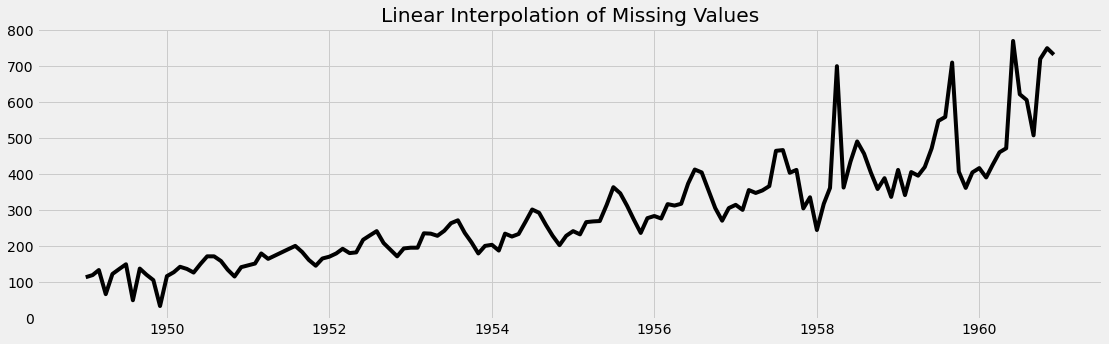

In [3]:
plt.rcParams['figure.figsize']=(17,5)
data['Customers_linear']=data['Customers'].interpolate(method='linear')
plt.plot(data['Customers_linear'],color='black')
plt.title("Linear Interpolation of Missing Values")
plt.show()

In [4]:
#getting statistical information
data.describe()

Customers  Customers_linear
count  140.000000        144.000000
mean   291.878571        291.194444
std    150.040592        148.877256
min     34.000000         34.000000
25%    180.000000        180.750000
50%    265.500000        265.500000
75%    364.750000        364.750000
max    770.000000        770.000000

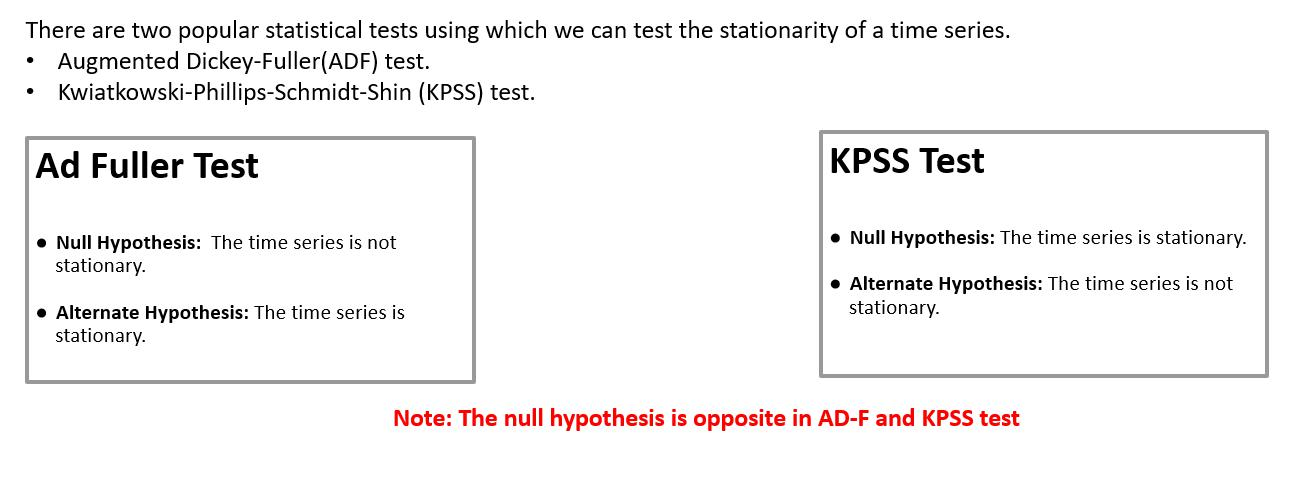

## Augmented Dickey-Fuller Test for Stationarity
Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series.
* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root* and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


- *Unit root: vt=c+a1vt−1+ϵt−1 

The coefficient a1 is a root .You can interpret this process/formula as ‘the value of today depends on the value of yesterday and some randomness we can’t predict’. We expect this process to always converge back to the value of c. Try this is out with an example: suppose c=0 and a1=0.5. If yesterday (vt−1) the value was 100, then we expect that today the value will be around 50. Tomorrow, we expect the value to be 25 and so on. You see that this series will ‘come home’, in this case meaning it will converge back to the value of c.

When one of the roots is a unit, i.e. equal to 1 (in this example when a1=1), then this series will not recover to its origin. You can see this by using the example given above. That is why the concepts of unit roots and unit root tests are useful: it give us insights in whether the time series will recover to its expected value. If this is not the case, then the process will be very susceptible to shocks and hard to predict and control.

In [5]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Customers_linear'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: 2.980673809082903
n_lags: 1.0
p-value: 1.0
Critial Values:
   1%, -3.482087964046026
Critial Values:
   5%, -2.8842185101614626
Critial Values:
   10%, -2.578864381347275


In [6]:
# Since the P value is 1.0 which is > than 0.05, we can conclude that the series is not stationary

## Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
The Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test figures out if a time series is stationary around a mean or linear trend, or is non-stationary due to a unit root. A stationary time series is one where statistical properties — like the mean and variance — are constant over time.

For KPSS test, 
* The Null Hypothesis : The series is stationary
when p-value >0.05
* Alternate Hypothesis: The series is not stationary
when p-value <= 0.5


In [7]:
#loading kpss from statsmodel
from statsmodels.tsa.stattools import kpss

result = kpss(data['Customers_linear'])
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'num lags: {result[2]}')
print('Critial Values:')
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  


KPSS Statistic: 1.0606088884543792
p-value: 0.01
num lags: 14
Critial Values:
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\Varun Salunkhe\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [8]:
# since the p value is 0.01 which is less than 0.5, we can conclude from KPSS that the series is not stationary

# Non-Stationary Series to Stationary Series
There are two tools for converting a non-stationary series into a stationary series.

1)	Differencing

2)	Transformation

- Differencing:Differencing tool is used to make the mean constant for a time series. That means it removes the trend from the series. 

Differencing means to calculate the difference between consecutive observations. Differencing stabilises the mean of the time series by removing the trend from the series.

- Transformation like BoxCox

The mathematical formula for box cox transformation is:
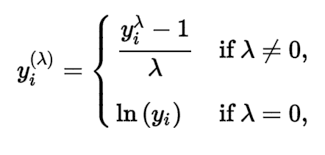

The procedure is to find the optimal value of lambda between -5 and +5 to minimize the variance of the time series.

## Box Cox Transformation
A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn't normal, applying a Box-Cox means that you are able to run a broader number of tests.

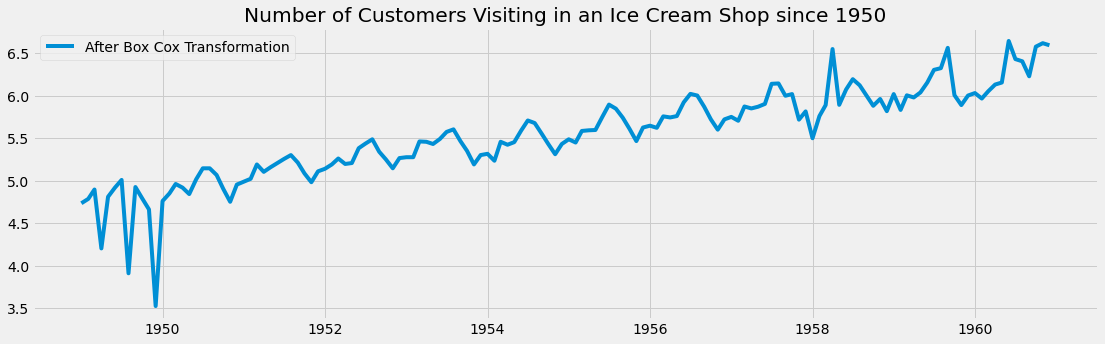

Date
1949-01-01         NaN
1949-02-01    4.736198
1949-03-01    4.787492
1949-04-01    4.897840
1949-05-01    4.204693
                ...   
1960-08-01    6.432940
1960-09-01    6.406880
1960-10-01    6.230481
1960-11-01    6.579251
1960-12-01    6.620073
Length: 144, dtype: float64

In [9]:
# box cox transformation
from scipy.stats import boxcox

data_boxcox = pd.Series(boxcox(data['Customers_linear'],lmbda=0),index=data.index)
plt.plot(data_boxcox, label="After Box Cox Transformation")
plt.legend()
plt.title("Number of Customers Visiting in an Ice Cream Shop since 1950")
plt.show()
data_boxcox.shift()

## Differencing

Differencing stabilises the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality. 

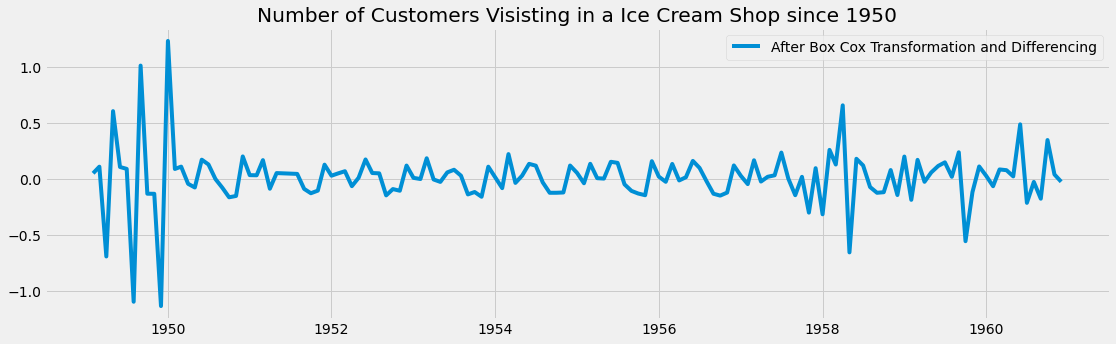

In [10]:
# differencing
data_boxcox_difference= pd.Series(data_boxcox - data_boxcox.shift(), index=data.index)
data_boxcox_difference.dropna(inplace=True)
plt.plot(data_boxcox_difference, label="After Box Cox Transformation and Differencing")
plt.legend()
plt.title("Number of Customers Visisting in a Ice Cream Shop since 1950")
plt.show()

## ADF Test

Checking stationary after transformation

In [11]:
# checking stationarity after transformation using ADF Test
from statsmodels.tsa.stattools import adfuller

result = adfuller(data_boxcox_difference, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]:.20f}')
print(f'p-value: {result[1]:.20f}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -10.526510513706848
n_lags: 0.00000000000000000094
p-value: 0.00000000000000000094
Critial Values:
   1%, -3.4808880719210005
Critial Values:
   5%, -2.8836966192225284
Critial Values:
   10%, -2.5785857598714417


## KPSS Test
Checking stationarity after transformation using KPSS

In [12]:
# checking stationarity after transformation using KPSS Test
from statsmodels.tsa.stattools import kpss
result = kpss(data_boxcox_difference)
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'num lags: {result[2]}')
print('Critial Values:')
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

KPSS Statistic: 0.07116934656329461
p-value: 0.1
num lags: 14
Critial Values:
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\Varun Salunkhe\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


### Auto Correlation function

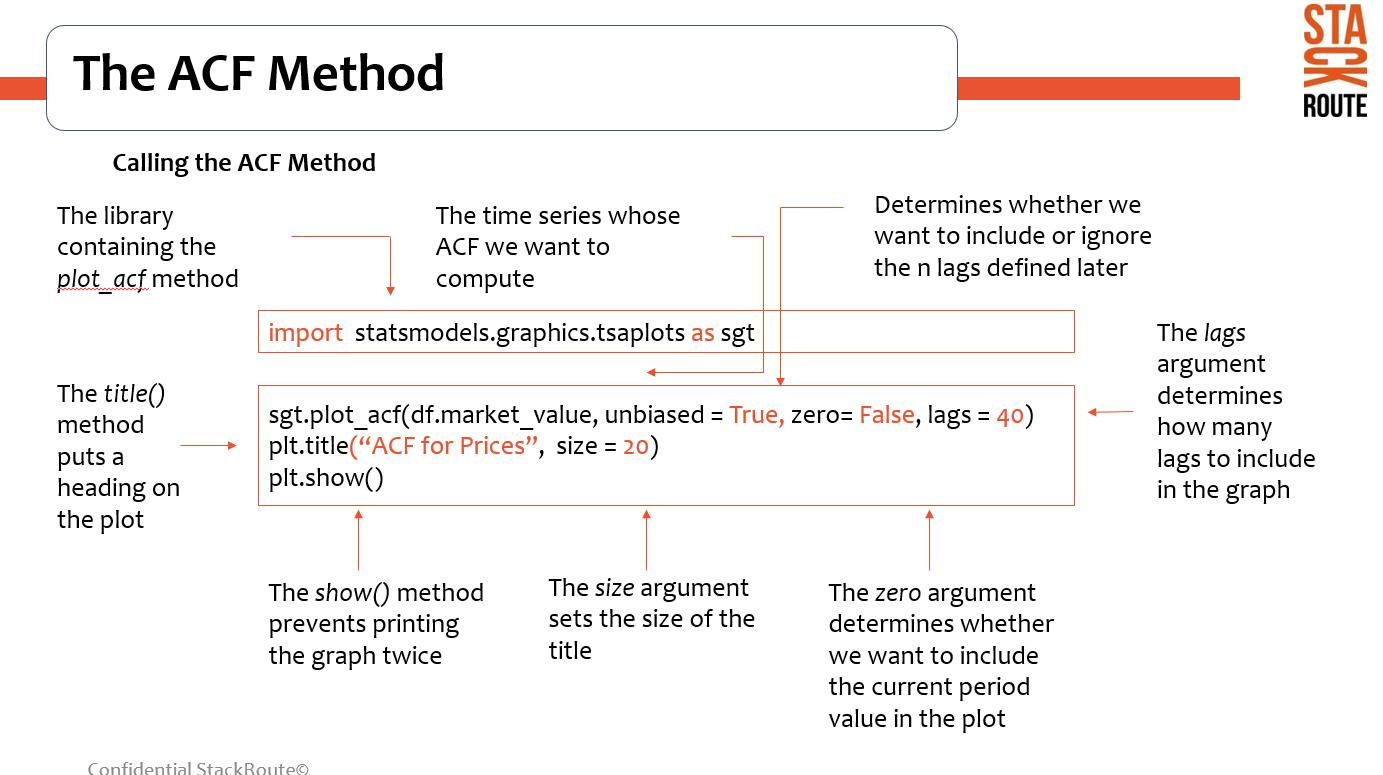

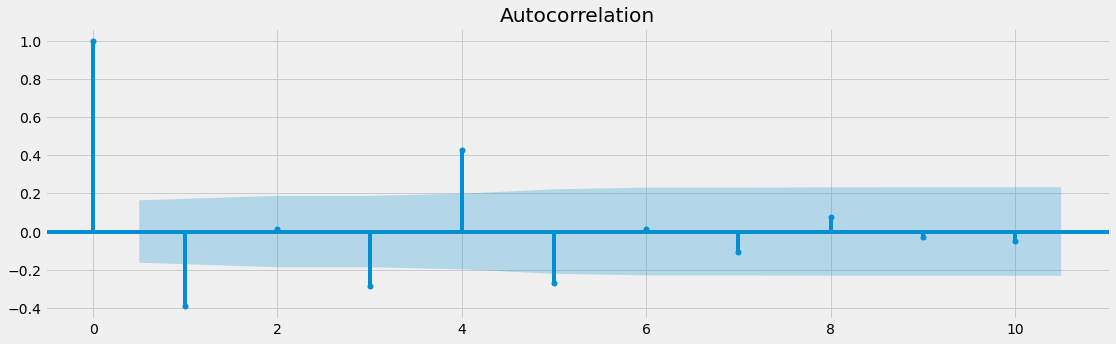

In [13]:
#Loading and plotting acf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_boxcox_difference, ax=plt.gca(), lags=10)
plt.show()

### Partial correlation function

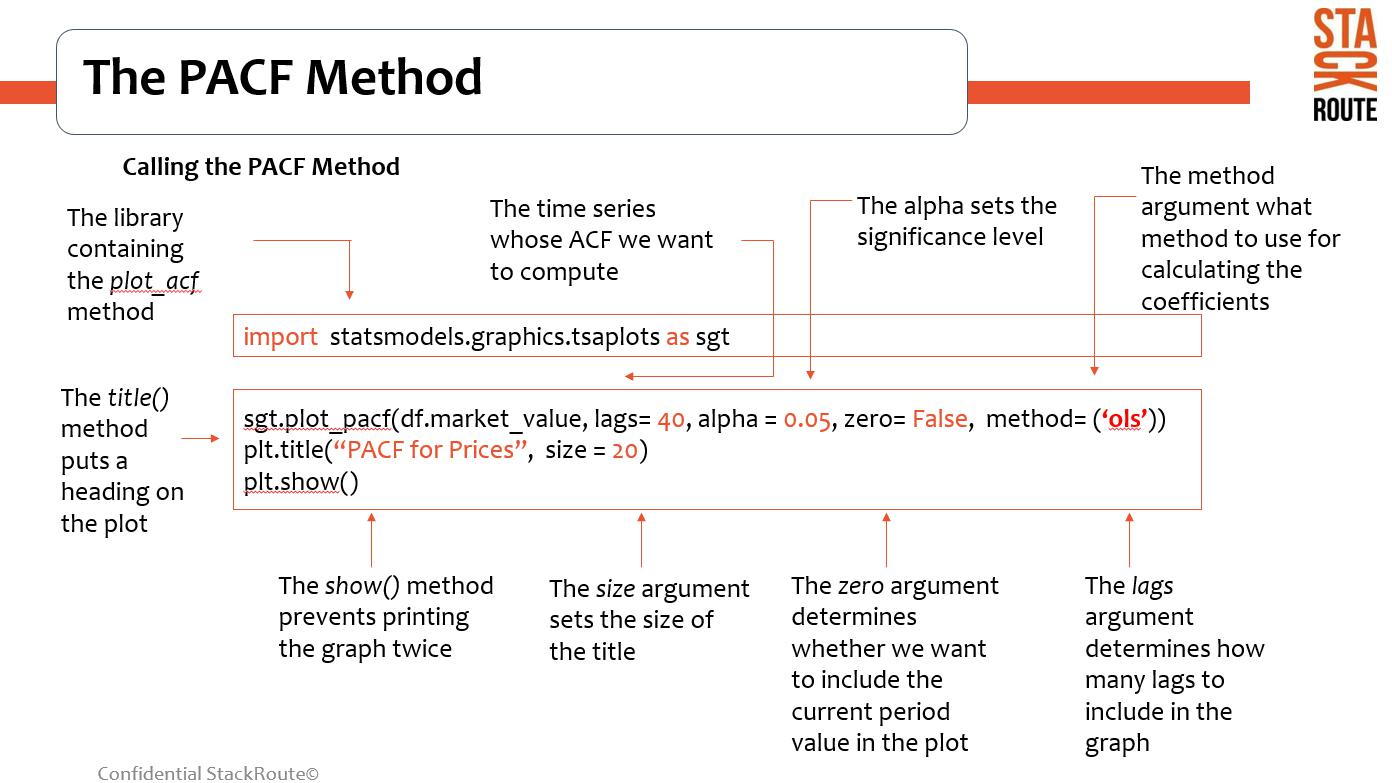

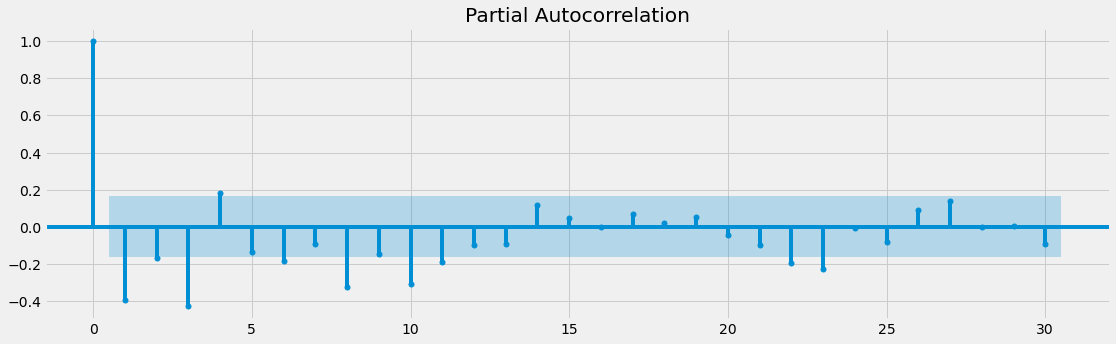

In [14]:
#Loading and plottin pacf
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_boxcox_difference, ax=plt.gca(), lags=30)
plt.show()

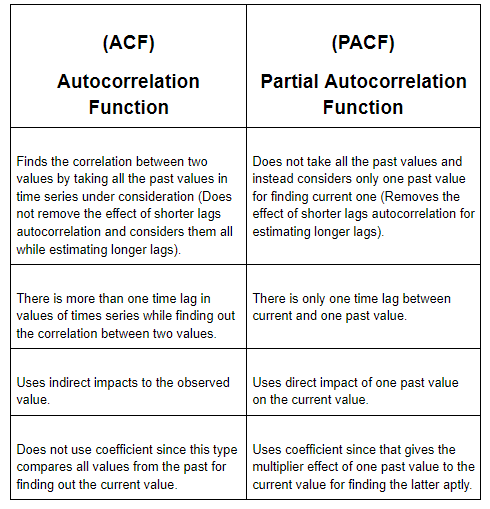

### Splitting the time series

In [15]:
length_train = 115
train = data.iloc[:length_train,:]
test=data.iloc[length_train:,: ]

train_data_boxcox = data_boxcox[:length_train]
test_data_boxcox = data_boxcox[length_train:]

train_data_boxcox_difference = data_boxcox_difference[:length_train-1]
test_data_boxcox_difference = data_boxcox_difference[length_train-1:]

In [16]:
# Please note we use the standard function ARIMA within statsmodel to configure AR,MA, ARMA,ARIMA & SARIMA. 
#We dnt have seperate functions for each.

# if both ACF and PACF plots demonstrate a gradual decreasing pattern, then the ARMA process should be considered for modeling.

## Simple Auto Regressive Model (AR Model)

In [17]:
from statsmodels.tsa.arima_model import ARIMA
# AR = P, I = ? , Q = q.

model_ar = ARIMA(train_data_boxcox_difference, order=(1,0,0)) # p is lag 1 which means only one period previous value
model_fit = model_ar.fit()
print(model_fit.params)

const      0.012438
ar.L1.y   -0.402639
dtype: float64


C:\Users\Varun Salunkhe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [34]:
# recover original time series data
y_ar_new = data_boxcox_difference.copy()
y_ar_new['ar_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(), data_boxcox_difference.index.max())
y_ar_new['ar_forecast_boxcox'] = y_ar_new['ar_forecast_boxcox_difference'].cumsum()
y_ar_new['ar_forecast_boxcox'] = y_ar_new['ar_forecast_boxcox'].add(data_boxcox[0])
y_ar_new['ar_forecast'] = np.exp(y_ar_new['ar_forecast_boxcox'])
y_ar_new['ar_forecast_boxcox_difference']

1949-02-01    0.012126
1949-03-01   -0.003747
1949-04-01   -0.042648
1949-05-01    0.352758
1949-06-01   -0.084239
                ...   
1960-08-01    0.012126
1960-09-01    0.012126
1960-10-01    0.012126
1960-11-01    0.012126
1960-12-01    0.012126
Freq: MS, Length: 143, dtype: float64

In [31]:
plt.figure(figsize=(17,8))

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_ar_new['ar_forecast'][test.index.min():], label = 'AR model')

plt.legend()
plt.title('Auto regressive model')
plt.show()

## Moving Average Model (MA Model)

In Moving Average Model, we consider the past forecasted errors to forecast the future values.

The moving average model has a parameter called “q” which is the size of the moving average window over which linear combinations of errors are calculated.

The mathematical equation is:-

y(t) = µ + φ(k)*ε(t-k)

µ is the mean of the series

ε(t-k) is the past forecasted value

φ(k) is the weight associated with error value


In [20]:
#from statsmodels.tsa.arima_model import ARIMA

model_ma = ARIMA(train_data_boxcox_difference, order=(0,0,7)) # number of past errors is 7
model_fit = model_ma.fit()
print(model_fit.params)

C:\Users\Varun Salunkhe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


const      0.012756
ma.L1.y   -0.572807
ma.L2.y   -0.198472
ma.L3.y   -0.124698
ma.L4.y    0.693982
ma.L5.y   -0.292083
ma.L6.y   -0.126614
ma.L7.y   -0.379307
dtype: float64


C:\Users\Varun Salunkhe\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Varun Salunkhe\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [21]:
# recover original time series
y_ma_new = data_boxcox_difference.copy()
y_ma_new['ma_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(), data_boxcox_difference.index.max())
y_ma_new['ma_forecast_boxcox'] = y_ma_new['ma_forecast_boxcox_difference'].cumsum()
y_ma_new['ma_forecast_boxcox'] = y_ma_new['ma_forecast_boxcox'].add(data_boxcox[0])
y_ma_new['ma_forecast'] = np.exp(y_ma_new['ma_forecast_boxcox'])

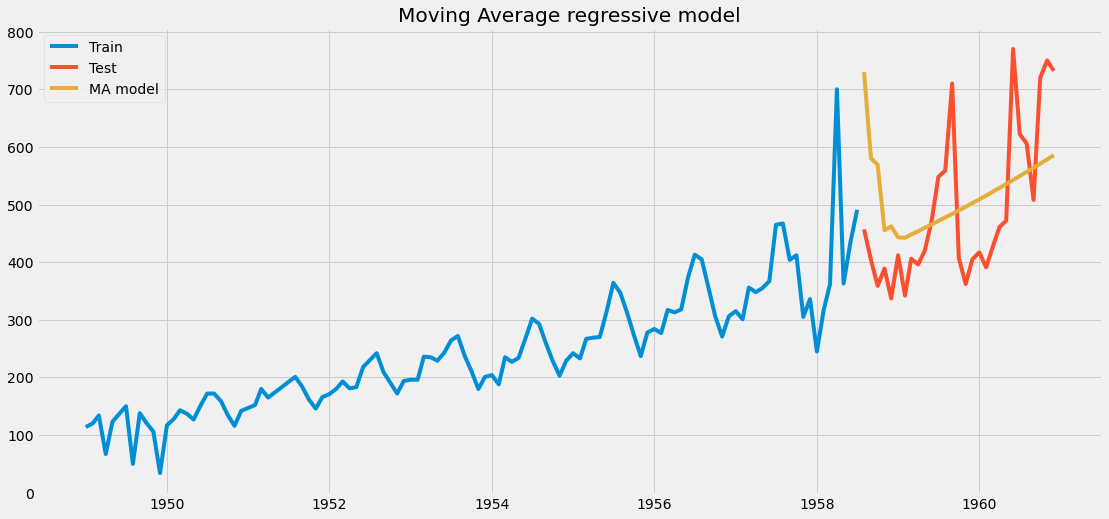

In [22]:
plt.figure(figsize=(17,8))

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_ma_new['ma_forecast'][test.index.min():], label = 'MA model')

plt.legend()
plt.title('Moving Average regressive model')
plt.show()

# If both ACF and PACF plots demonstrate a gradual decreasing pattern, then the ARMA process should be considered for modeling.

# Auto Regressive Moving Average Model (ARMA)
ARMA Model combines both AR and MA model.

It takes into account one or more past observations as well as the past errors.

The ARMA model contains two parameters p and q

p is the highest lag in the time series

q is the number of past errors included

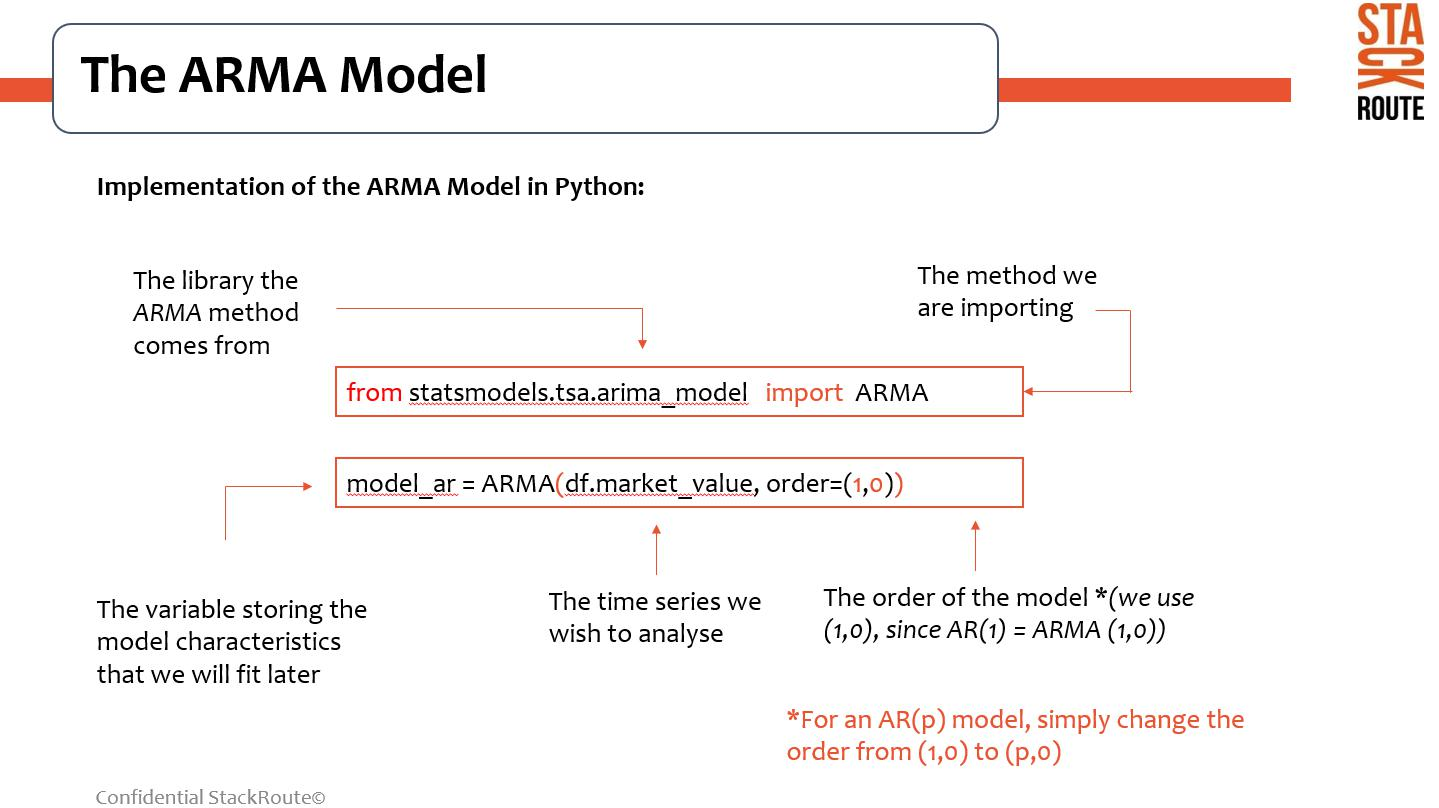
  

In [23]:
from statsmodels.tsa.arima_model import ARIMA

model_arma = ARIMA(train_data_boxcox_difference, order=(1,0,5)) # p= Highest lag is 1 i.e one period before : 
# q=5 number of past errors
model_fit = model_arma.fit()
print(model_fit.params)

C:\Users\Varun Salunkhe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


const      0.012126
ar.L1.y   -0.524608
ma.L1.y   -0.087658
ma.L2.y   -0.598563
ma.L3.y   -0.373439
ma.L4.y    0.281355
ma.L5.y   -0.221694
dtype: float64


In [24]:
# Recover orginal time series
y_arma_new = data_boxcox_difference.copy()
y_arma_new['arma_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                                  data_boxcox_difference.index.max())
y_arma_new['arma_forecast_boxcox'] = y_arma_new['arma_forecast_boxcox_difference'].cumsum()
y_arma_new['arma_forecast_boxcox'] = y_arma_new['arma_forecast_boxcox'].add(data_boxcox[0])
y_arma_new['arma_forecast'] = np.exp(y_arma_new['arma_forecast_boxcox'])

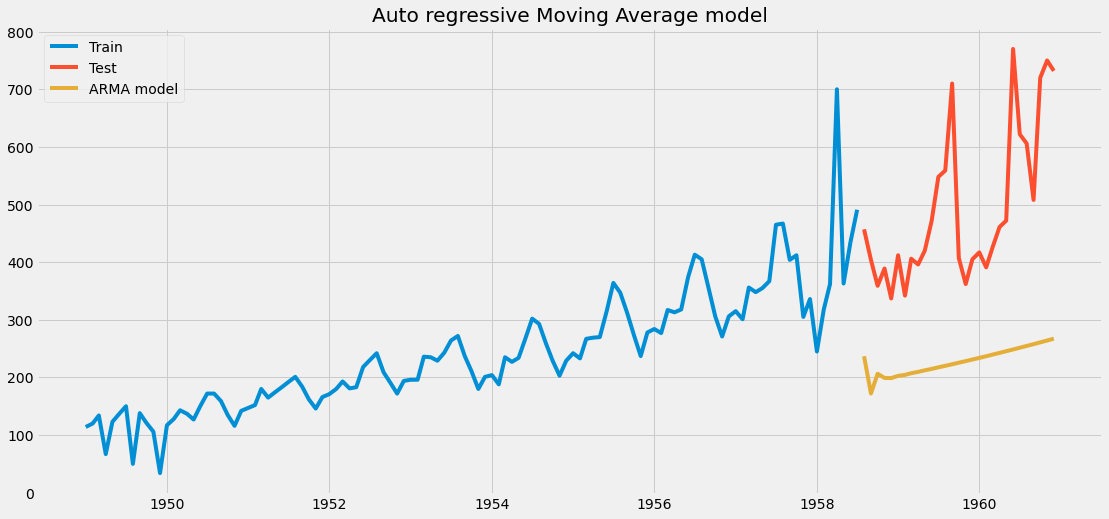

In [25]:
# Plotting Train, Test and Forecast
plt.figure(figsize=(17,8))

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_arma_new['arma_forecast'][test.index.min():], label = 'ARMA model')

plt.legend()
plt.title('Auto regressive Moving Average model')
plt.show()

note: Geometry is geometric decay - going on till infinity towards zero
AR : ACF Geometric, PACF Significant till p pags
MA: ACF Significant till p pags, PACF Geometric
ARMA: ACF and PACF both are Geometric